In [18]:
import pandas as pd
import numpy as np
import matplotlib
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### PLOTLY LIBRARIES

In [19]:
import plotly
plotly.tools.set_credentials_file(username='linus.austen.mcmanamey', api_key='3tqgEzyZAGTIeFY5sQ1T')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.graph_objs import Surface, Layout, Scene
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
init_notebook_mode(connected=True)
import plotly.tools as tls
plotly.__version__

'2.0.9'

In [20]:
#! conda install --channel https://conda.anaconda.org/conda-forge plotly=1.13.0

In [21]:
#! pip install cufflinks --upgrade

### list all csv files in directory

In [22]:
#!ls *.csv

### list all excel files in directory

In [23]:
#!ls *.xls

In [24]:
SA4 = pd.read_excel('SA4 Time Series - October 2016.xls', sheetname = 'Time Series') # we will have to specify the sheet name
SA4.head(5)

,State/Territory,Date,Employment Rate (15-64),Unemployment Rate (15+),Participation Rate (15+)
0,NSW,1978-02-01,n/a,6.773762,60.735313
1,NSW,1978-03-01,n/a,6.490161,59.851078
2,NSW,1978-04-01,63.7195,6.507978,60.168513
3,NSW,1978-05-01,63.682,6.115171,60.003564
4,NSW,1978-06-01,63.6829,6.424127,60.145380


### rename columns

In [25]:
SA4 = SA4.rename(columns={'State/Territory':'State'})
SA4 = SA4.rename(columns={'Employment Rate (15-64)':'E_Rate'})
SA4 = SA4.rename(columns={'Unemployment Rate (15+)':'U_Rate'})
SA4 = SA4.rename(columns={'Participation Rate (15+)':'P_Rate'})
SA4.head(5)

,State,Date,E_Rate,U_Rate,P_Rate
0,NSW,1978-02-01,n/a,6.773762,60.735313
1,NSW,1978-03-01,n/a,6.490161,59.851078
2,NSW,1978-04-01,63.7195,6.507978,60.168513
3,NSW,1978-05-01,63.682,6.115171,60.003564
4,NSW,1978-06-01,63.6829,6.424127,60.145380


In [26]:
print("check for number of n/a's  in E_Rate")
len(SA4[SA4.E_Rate  == 'n/a'])

check for number of n/a's  in E_Rate


16

### Remove 'n/a' and cast as float

In [27]:
SA4 = SA4[SA4.E_Rate  != 'n/a']
SA4.E_Rate = SA4.E_Rate.astype('float')
print(len(SA4))

3704


### Check  dataframe types

In [28]:
SA4.dtypes

State             object
Date      datetime64[ns]
E_Rate           float64
U_Rate           float64
P_Rate           float64
dtype: object

###  check for null values

In [29]:
SA4.U_Rate.isnull().sum()
SA4.P_Rate.isnull().sum()
SA4.E_Rate.isnull().sum()

0

0

0

### Set Date as index and then remove "Date" column

In [30]:
SA4.index = pd.to_datetime(SA4.Date)
SA4 = SA4.drop('Date', axis=1)
SA4.head(5)

,State,E_Rate,U_Rate,P_Rate
Date,,,,
1978-04-01,NSW,63.719468,6.507978,60.168513
1978-05-01,NSW,63.682010,6.115171,60.003564
1978-06-01,NSW,63.682900,6.424127,60.145380
1978-07-01,NSW,63.696062,6.100929,59.884195
1978-08-01,NSW,63.541314,6.258992,60.075240


### import csv files to pandas data frame

In [31]:
ERP = pd.read_csv('ERP_by state and gender.csv',infer_datetime_format=True,parse_dates=True, index_col=0)
jobVacDF = pd.read_csv('Job Vacancies.csv',header=0,index_col=0, infer_datetime_format=True, parse_dates=True)

In [32]:
jobVacDF.head(5)

,2006-01-01,2006-02-01,2006-03-01,2006-04-01,2006-05-01,2006-06-01,2006-07-01,2006-08-01,2006-09-01,2006-10-01,...,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01
State,,,,,,,,,,,,,,,,,,,,,
NSW,73047.8,73995.0,75246.3,76539.8,75614.9,81637.1,77047.4,78148.5,76411.3,82945.5,...,65297.0,64206.1,63909.2,65951.1,66060.8,66225.8,65063.3,65154.9,63121.4,63534.1
VIC,49399.3,51027.9,51492.4,51473.1,50570.0,53746.2,52149.5,52783.5,51013.6,56556.5,...,42227.9,41179.8,40338.7,42380.6,42968.9,42947.6,42292.8,42511.9,40092.0,42182.9
QLD,49807.5,49526.3,49233.0,50440.4,51387.3,54667.4,45802.9,51814.4,51180.1,55388.3,...,29960.6,29343.9,28065.8,29299.3,29289.6,29800.4,28935.9,29292.3,28885.3,29695.4
SA,13111.4,13160.9,13669.6,13308.7,13095.8,13611.8,13762.3,14033.7,13287.1,13886.8,...,6675.6,6697.5,6737.0,6959.7,6943.3,7521.8,7208.4,7218.4,6976.9,7005.8
WA,18087.6,18943.3,19739.3,19854.2,20351.9,22077.5,20374.8,20834.9,20614.3,21736.4,...,13695.0,13146.9,12792.1,13159.4,13335.0,13113.0,12624.8,12649.2,12224.9,12323.4


### transpose dataframe

In [33]:
jobVacDF = jobVacDF.T


In [34]:
jobVacDF.head(5)

State,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-01-01,73047.8,49399.3,49807.5,13111.4,18087.6,2895.0,2563.0,3165.3
2006-02-01,73995.0,51027.9,49526.3,13160.9,18943.3,2874.7,2402.0,3335.5
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
2006-04-01,76539.8,51473.1,50440.4,13308.7,19854.2,2833.2,2590.6,3493.0
2006-05-01,75614.9,50570.0,51387.3,13095.8,20351.9,2747.1,2805.4,3666.7


### convert index column to datetime value

In [35]:
jobVacDF.index = pd.to_datetime(jobVacDF.index)

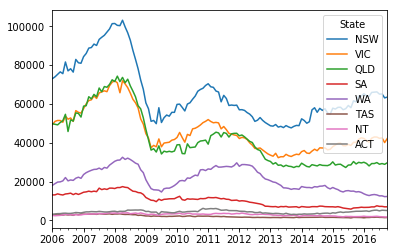

In [36]:
jobVacDF['2006-01-01':'2016-10-01'].plot()

In [37]:
for (name, series) in jobVacDF.iteritems():
 print('Col name: ' + str(name))

Col name: NSW
Col name: VIC
Col name: QLD
Col name: SA
Col name: WA
Col name: TAS
Col name: NT
Col name: ACT


### Plot  -  Number of Job Vacancies per year by State

In [38]:
data = []
for (name, series) in jobVacDF.iteritems():
            data.append(dict(type='scatter', mode='lines',x=jobVacDF.index, y=jobVacDF[name], name=jobVacDF[name].name))

layout = dict(title='Number of Job Vacancies per year by State',showlegend=True)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'basic-line')

## Rename  Estimated Resident Population dataframe columns

In [39]:
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  New South Wales ;':'NSW_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Victoria ;':'VIC_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Queensland ;':'QLD_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  South Australia ;':'SA_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Western Australia ;':'WA_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Tasmania ;':'TAS_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Northern Territory ;':'NT_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Australian Capital Territory ;':'ACT_Male'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Male ;  Australia ;':'AUST_Male'})

ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  New South Wales ;':'NSW_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Victoria ;':'VIC_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Queensland ;':'QLD_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  South Australia ;':'SA_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Western Australia ;':'WA_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Tasmania ;':'TAS_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Northern Territory ;':'NT_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Australian Capital Territory ;':'ACT_Female'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Female ;  Australia ;':'AUST_Female'})


ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  New South Wales ;':'NSW_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Victoria ;':'VIC_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Queensland ;':'QLD_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  South Australia ;':'SA_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Western Australia ;':'WA_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Tasmania ;':'TAS_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Northern Territory ;':'NT_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;':'ACT_Persons'})
ERP = ERP.rename(columns={'Estimated Resident Population ;  Persons ;  Australia ;':'TOTAL'})

### convert index column to datetime value

In [40]:
ERP.index = pd.to_datetime(ERP.index)

In [41]:
ERP.head(2)

,NSW_Male,VIC_Male,QLD_Male,SA_Male,WA_Male,TAS_Male,NT_Male,ACT_Male,AUST_Male,NSW_Female,...,AUST_Female,NSW_Persons,VIC_Persons,QLD_Persons,SA_Persons,WA_Persons,TAS_Persons,NT_Persons,ACT_Persons,TOTAL
2005-12-01,3327461,2481962,1977783,762665,1022918,240625,107839,164850,10087382,3390562,...,10224161,6718023,5023203,3964175,1544852,2029936,488098,207385,333505,20311543
2006-03-01,3336005,2495951,1989764,765272,1030021,241193,108137,165351,10132982,3399523,...,10265150,6735528,5048207,3987653,1550135,2042450,489140,208347,334299,20398132


### break down dataframes in to population totals by state

In [42]:
maleDF = ERP[[col for col in ERP.columns if "Male" in col]]
femaleDF = ERP[[col for col in ERP.columns if "Female" in col]]
personDF = ERP[[col for col in ERP.columns if "Persons" in col]]

### Rename to population totals by state

In [43]:
personDF = personDF.rename(columns={'NSW_Persons':'NSW'})
personDF = personDF.rename(columns={'VIC_Persons':'VIC'})
personDF = personDF.rename(columns={'QLD_Persons':'QLD'})
personDF = personDF.rename(columns={'SA_Persons':'SA'})
personDF = personDF.rename(columns={'WA_Persons':'WA'})
personDF = personDF.rename(columns={'TAS_Persons':'TAS'})
personDF = personDF.rename(columns={'NT_Persons':'NT'})
personDF = personDF.rename(columns={'ACT_Persons':'ACT'})

In [44]:
populationDF = personDF.copy()

In [45]:
data = []
for (name, series) in populationDF.iteritems():
            data.append(dict(type='scatter', mode='lines',x=populationDF.index, y=populationDF[name], name=populationDF[name].name))


layout = dict(title='Population States  of Australia',showlegend=True)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'basic-line')

### Initial plot to check populationDF working

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np

frame =[]
data = []



year = populationDF.index.tolist()
for (name, series) in populationDF.iteritems():
    data.append(dict(type='scatter', x=populationDF.index, y=populationDF[name], name=populationDF[name].name,mode='markers', 
                    marker=dict(symbol='circle', size=populationDF[name]/100000 ,sizeref=0.65, sizemode='radius')))
   
   
    
   


  
          
figure1=dict(data=data, layout=layout)          
iplot(figure1)

### Retrive list of dates from index of population dataframe and subset other dataframes for the same dates

In [46]:
baseDates = populationDF.index.tolist()
jobVacDF = jobVacDF.ix[baseDates]
SA4 = SA4.ix[baseDates]

In [47]:
jobVacDF.head(2)
populationDF.head(2)
SA4.head(2)

State,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2005-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9


,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2005-12-01,6718023,5023203,3964175,1544852,2029936,488098,207385,333505
2006-03-01,6735528,5048207,3987653,1550135,2042450,489140,208347,334299


,State,E_Rate,U_Rate,P_Rate
Date,,,,
2005-12-01,NSW,70.481740,5.293757,63.106123
2005-12-01,VIC,71.806591,5.260037,64.045364


### Drop All NAN rows

In [48]:
populationDF = populationDF.dropna(how='any')
jobVacDF = jobVacDF.dropna(how='any')

### chage structure of dataframe to match other two
* Extract the unemployment rate

In [49]:
print("Before_____________")
SA4.head(2)
unemploymentDF = SA4.pivot(columns='State', values='U_Rate')
del unemploymentDF.index.name
print("After_____________")
unemploymentDF.head(2)

Before_____________


,State,E_Rate,U_Rate,P_Rate
Date,,,,
2005-12-01,NSW,70.481740,5.293757,63.106123
2005-12-01,VIC,71.806591,5.260037,64.045364


After_____________


State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
2005-12-01,3.422536,5.293757,6.004577,4.863610,4.868181,5.962563,5.260037,4.326411
2006-03-01,3.254369,4.978780,5.765331,4.705125,5.035000,6.608448,5.112932,3.988064


### Check structure an print 

In [50]:
print(len(jobVacDF))
jobVacDF.head(2)
print(len(populationDF))
populationDF.head(2)
print(len(unemploymentDF))
unemploymentDF.head(2)

38


State,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
2006-06-01,81637.1,53746.2,54667.4,13611.8,22077.5,2978.1,3201.0,3719.0


39


,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2005-12-01,6718023,5023203,3964175,1544852,2029936,488098,207385,333505
2006-03-01,6735528,5048207,3987653,1550135,2042450,489140,208347,334299


39


State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
2005-12-01,3.422536,5.293757,6.004577,4.863610,4.868181,5.962563,5.260037,4.326411
2006-03-01,3.254369,4.978780,5.765331,4.705125,5.035000,6.608448,5.112932,3.988064


### Drop first row so dates indexes are the same for each dataframe

In [51]:
unemploymentDF = unemploymentDF.drop(unemploymentDF.index[[0]])
populationDF = populationDF.drop(populationDF.index[[0]])

In [52]:
print(len(jobVacDF))
jobVacDF.head(2)
print(len(populationDF))
populationDF.head(2)
print(len(unemploymentDF))
unemploymentDF.head(2)

38


State,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
2006-06-01,81637.1,53746.2,54667.4,13611.8,22077.5,2978.1,3201.0,3719.0


38


,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-03-01,6735528,5048207,3987653,1550135,2042450,489140,208347,334299
2006-06-01,6742690,5061266,4007992,1552529,2050581,489302,209057,335170


38


State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
2006-03-01,3.254369,4.978780,5.765331,4.705125,5.035000,6.608448,5.112932,3.988064
2006-06-01,3.004263,5.288439,4.942226,4.500243,4.730513,6.669892,5.021526,3.351213


In [53]:
dataset = pd.DataFrame() 
dataset['unemployment'] = unemploymentDF.unstack()
dataset['population'] = populationDF.unstack()
dataset['jobVacancies'] = jobVacDF.unstack()

In [54]:
dataset.reset_index(level=0, inplace=True)

### Plot table of dataframe

In [55]:
table = FF.create_table(dataset.head(10))
py.iplot(table, filename='animations-gapminder-data-preview')

C:\Users\linus\Anaconda2\lib\site-packages\plotly\tools.py:1422: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



## Generate a Motion chart
* number of job vacancies on the x-axis, 
* unemployment rate on the y-axis, 
* the colour the bubbles is given by the state and the size of the bubbles is given by the population of the state.

In [59]:
years = dataset.index.unique()
years = years.strftime('%Y-%m-%d')
years = sorted(years)
states = dataset.State.unique()
states = sorted(states)
figure = {
    'data': [],
    'layout': {},
    'frames': [],
    'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [ dataset.jobVacancies.min(), dataset.jobVacancies.max()],'title': 'Job Vacancies'}
figure['layout']['yaxis'] = {'range': [ dataset.unemployment.min(), dataset.unemployment.max()],'title': 'unemployment', 'type':'linear'}
figure['layout']['hovermode'] = 'closest'
#figure['layout']['autosize'] = False
figure['layout']['Margin']  = {'l':50, 'r': 50, 'b': 100, 't': 100, 'pad':4}

In [60]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 300, 'redraw': False},'fromcurrent': True, 
                                'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play','method': 'animate'},
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 1, 't': 1},
        'showactive': True,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

In [61]:
figure['layout']['slider'] = {
    'args': [
        'slider.value', {
            'duration': 300,
            'ease': 'cubic-in-out'
        }
    ],
    'initialValue': years[0],
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}

In [62]:
    
sliders_dict = {
    'active': 1,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year: ',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [63]:

for state in states:
    dataset_by_state = dataset[dataset['State'] == state]
    figure['data'].append(dict(textposition="middle right",
                               hoverinfo ="all", 
                               type='scatter', 
                               x=dataset_by_state['jobVacancies'], 
                               y=dataset_by_state['unemployment'],
                               name=state,mode='markers',
                               marker=dict(symbol='circle', 
                                           size=dataset_by_state['population']/100000,
                                           sizeref=0.8, 
                                           sizemode='radius')))

In [64]:
for year in years:
    frame = {'data': [], 'name': str(year)}
    for state in states:
        dataset_by_state = dataset[dataset.index == year]
        dataset_by_state = dataset_by_state[dataset_by_state['State'] == state]
        frame['data'].append(dict(textposition="middle right",
                                  hoverinfo ="all",
                                  type='scatter',
                                  x=dataset_by_state['jobVacancies'], 
                                  y=dataset_by_state['unemployment'],
                                  name=state,mode='markers',
                                  marker=dict(symbol='circle', 
                                              size=dataset_by_state['population']/100000 ,
                                              sizeref=0.8, 
                                              sizemode='radius')))
    
    figure['frames'].append(frame)
    slider_step = {'args': [[year],{'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate','transition': {'duration': 300,  'easing': 'cubic-in-out'}}],'label': year,'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]
iplot(figure)

PlotlyError: Invalid 'figure_or_data' argument. Plotly will not be able to properly parse the resulting JSON. If you want to send this 'figure_or_data' to Plotly anyway (not recommended), you can set 'validate=False' as a plot option.
Here's why you're seeing this error:

'Margin' is not allowed in 'layout'

Path To Error: ['layout']['Margin']

Valid attributes for 'layout' at path ['layout'] under parents ['figure']:

    ['angularaxis', 'annotations', 'autosize', 'bargap', 'bargroupgap',
    'barmode', 'barnorm', 'boxgap', 'boxgroupgap', 'boxmode', 'calendar',
    'direction', 'dragmode', 'font', 'geo', 'height', 'hiddenlabels',
    'hiddenlabelssrc', 'hidesources', 'hovermode', 'images', 'legend',
    'mapbox', 'margin', 'orientation', 'paper_bgcolor', 'plot_bgcolor',
    'radialaxis', 'scene', 'separators', 'shapes', 'showlegend', 'sliders',
    'smith', 'ternary', 'title', 'titlefont', 'updatemenus', 'width',
    'xaxis', 'yaxis']

Run `<layout-object>.help('attribute')` on any of the above.
'<layout-object>' is the object at ['layout']

# make frames
for year in years:
    frame = {'data': [], 'name': str(year)}
    for state in states:
        dataset_by_state = dataset[dataset.index == year]
        dataset_by_state = dataset_by_state[dataset_by_state['State'] == state]
        data_dict = {
            'x': list(dataset_by_state['unemployment']),
            'y': list(dataset_by_state['jobVacancies']),
            'mode': 'markers',
            'text': list(dataset_by_state['State']),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200000,
                'size': list(dataset_by_state['population']/100000)
            },
            'name': state
        }
        frame['data'].append(data_dict)
        
    figure['frames'].append(frame)
    slider_step = {'args': [[year],{'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate','transition': {'duration': 300,  'easing': 'cubic-in-out'}}],'label': year,'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]
iplot(figure)

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np

init_notebook_mode(connected=True)

N=50
s=np.linspace(-1,1,N)
vx=1+2*s
vy=1-2*s #v=(vx, vy) is the velocity
speed=np.sqrt(vx**2+vy**2)
ux=vx/speed #(ux, uy) unit tangent vector, (-uy, ux) unit normal vector
uy=vy/speed

xend=xx+ux #end coordinates for the unit tangent vector at (xx, yy)
yend=yy+uy

xnoe=xx-uy #end coordinates for the unit normal vector at (xx,yy)
ynoe=yy+ux


data=[dict(x=x, y=y,
           name='frame',
           mode='lines', 
           line=dict(width=2, color='blue')),
      dict(x=x, y=y,
           name='curve',
           mode='lines', 
           line=dict(width=2, color='blue'))
    ]

layout=dict(width=600, height=600,
            xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
            yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
            title='Moving Frenet Frame Along a Planar Curve', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

frames=[dict(data=[dict(x=[xx[k], xend[k], None, xx[k], xnoe[k]], y=[yy[k], yend[k], None, yy[k], ynoe[k]], 
                        mode='lines', 
                        line=dict(color='red', width=2))
                  ]) for k in range(N)]    
          
figure2=dict(data=data, layout=layout, frames=frames)          
iplot(figure2)